In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('/tmp/data',one_hot=True)

Extracting /tmp/data\train-images-idx3-ubyte.gz
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.images.shape # 55000 images and each image is an array of 784

(55000, 784)

In [7]:
mnist.train.images[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [8]:
mnist.train.images[2].shape

(784,)

In [9]:
sample = mnist.train.images[2].reshape(28,28)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

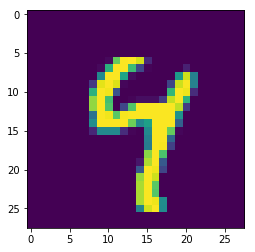

In [11]:
plt.imshow(sample)

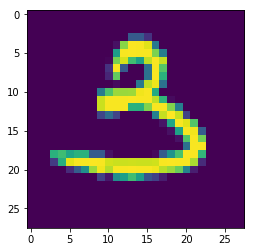

In [12]:
plt.imshow(mnist.train.images[152].reshape(28,28))

In [13]:
learning_rate = 0.001 # how quickly we adjust the cost function
training_epochs = 15 # no of training cycles we go through
batch_size = 100 # size of the batches of the training data

In [14]:
# network parameters
n_classes = 10 # because digits in our data goe from 0 to 9
n_samples = mnist.train.num_examples # 55000
n_input = 784

In [15]:
# no of neurons we want in the 2 hidden layers of our neural network
n_hidden_1 = 256
n_hidden_2 = 256

In [16]:
def multilayer_perceptron(x,weights,biases):
    '''
    x: placeholder for the data input
    weigths: dictionary of weights
    biases: dictionary of bias values
    '''
    
    # First Hidden Layer with RELU Activation
    # (X * W + B)
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    # RELU(X * W + B) -> f(x) = max(0,x)
    layer_1 = tf.nn.relu(layer_1)
    
    #Second Hidden Layer
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
    
    return out_layer

In [17]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

In [18]:
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [19]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [20]:
x = tf.placeholder('float',[None,n_input])
y = tf.placeholder('float',[None,n_classes])

In [21]:
pred = multilayer_perceptron(x,weights,biases)

In [22]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [23]:
# Training the model

In [24]:
Xsamp,ysamp = mnist.train.next_batch(1)

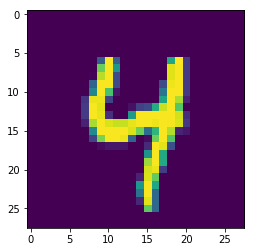

In [25]:
plt.imshow(Xsamp.reshape(28,28))

In [26]:
ysamp

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [27]:
# Run the session

In [28]:
sess = tf.InteractiveSession()

In [29]:
init = tf.initialize_all_variables() # initialize all variables defined previously

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [30]:
sess.run(init)

In [31]:
# 15 loops
for epoch in range(training_epochs):
    
    # Cost
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        
        batch_x,batch_y = mnist.train.next_batch(batch_size)
        
        _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
        
        avg_cost += c/total_batch
        
    print('Epoch: {} cost: {:.4f}'.format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost: 156.1093
Epoch: 2 cost: 41.8056
Epoch: 3 cost: 26.4951
Epoch: 4 cost: 18.4282
Epoch: 5 cost: 13.2971
Epoch: 6 cost: 9.7036
Epoch: 7 cost: 7.1613
Epoch: 8 cost: 5.4004
Epoch: 9 cost: 4.2155
Epoch: 10 cost: 3.1718
Epoch: 11 cost: 2.2728
Epoch: 12 cost: 1.6956
Epoch: 13 cost: 1.2302
Epoch: 14 cost: 1.0030
Epoch: 15 cost: 0.8530
Model has completed 15 Epochs of Training


In [32]:
# Model evaluation

In [33]:
correct_predictions = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [34]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [35]:
correct_predictions = tf.cast(correct_predictions, "float")

In [36]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [37]:
print(correct_predictions[0])

Tensor("strided_slice_2:0", shape=(), dtype=float32)


In [38]:
accuracy = tf.reduce_mean(correct_predictions)

In [39]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9493
